### Connect to the AML workspace

In [4]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

Ready to use Azure ML 1.47.0 to work with mlw-test


### Load the data into a Pandas dataframe

In [5]:
# load the data from a local file
import pandas as pd
df = pd.read_csv('../../data/diabetes/diabetes.csv')

### Show dataframe information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


### From the loaded data get the number of arrays and array elements. There are 15000 rows, each with 10 elements (or features)

In [3]:
df.shape

(15000, 10)

### Show the first 5 rows

In [4]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


### Show the last 5 rows

In [12]:
df.tail()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0
14999,1386396,3,114,65,47,512,36.215437,0.147363,34,1


### Get the data for a specific index

In [9]:
# Get the data for index value 5
df.loc[4]

PatientID                 1.424119e+06
Pregnancies               1.000000e+00
PlasmaGlucose             8.500000e+01
DiastolicBloodPressure    5.900000e+01
TricepsThickness          2.700000e+01
SerumInsulin              3.500000e+01
BMI                       4.260454e+01
DiabetesPedigree          5.495419e-01
Age                       2.200000e+01
Diabetic                  0.000000e+00
Name: 4, dtype: float64

### How many missing values for each column?

In [5]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

### Summary statistics for the numeric columns

In [6]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


### Get the mean of feature PlasmaGlucose

In [11]:
df["PlasmaGlucose"].mean()

107.85686666666666

### View unique values for pregnancies
Note using dot notation here to reference the column

In [11]:
df.Pregnancies.unique()

array([ 0,  8,  7,  9,  1,  3,  5,  2,  6, 11,  4, 13, 10, 12, 14])

### How many duplicate rows do we have?

In [14]:
df.duplicated().sum()

0

In [15]:
# this for loop to see all the data that have unexpected values
cols = ["PlasmaGlucose","DiastolicBloodPressure","SerumInsulin","TricepsThickness","BMI"]
to_see = []
for col in cols:
    unex_values = df[df[col] == 0]
    to_see.append(unex_values)
to_see

[Empty DataFrame
 Columns: [PatientID, Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age, Diabetic]
 Index: [],
 Empty DataFrame
 Columns: [PatientID, Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age, Diabetic]
 Index: [],
 Empty DataFrame
 Columns: [PatientID, Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age, Diabetic]
 Index: [],
 Empty DataFrame
 Columns: [PatientID, Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age, Diabetic]
 Index: [],
 Empty DataFrame
 Columns: [PatientID, Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age, Diabetic]
 Index: []]

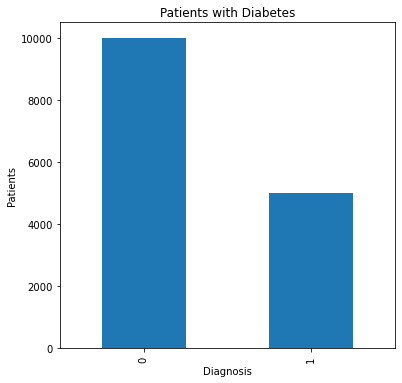

In [7]:
# Plot and log the count of diabetic vs non-diabetic patients
import matplotlib.pyplot as plt
diabetic_counts = df['Diabetic'].value_counts()
fig = plt.figure(figsize=(6,6))
ax = fig.gca()    
diabetic_counts.plot.bar(ax = ax) 
ax.set_title('Patients with Diabetes') 
ax.set_xlabel('Diagnosis') 
ax.set_ylabel('Patients')
plt.show()

### View the data distributions

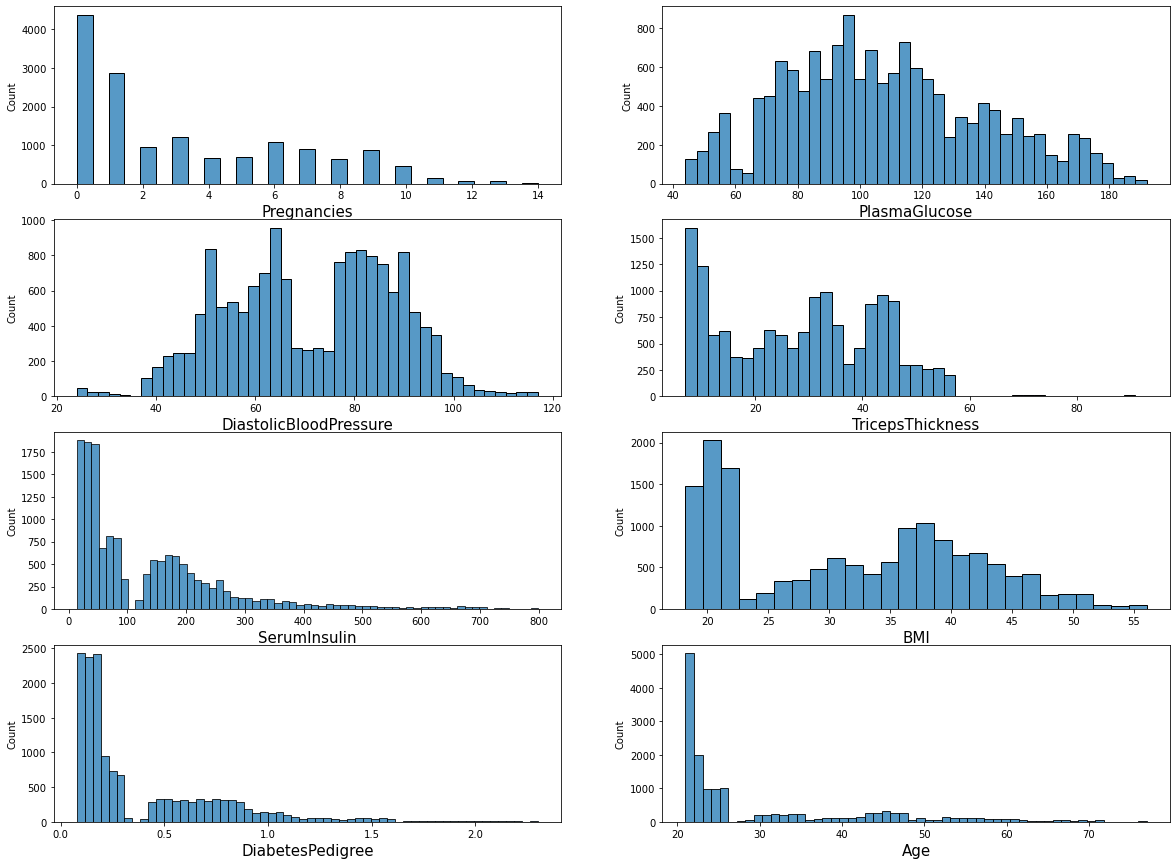

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ["Pregnancies", "PlasmaGlucose", "DiastolicBloodPressure", "TricepsThickness", "SerumInsulin", "BMI", "DiabetesPedigree", "Age"]
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

### View the data distribution by boxplot to quickly asses symmetry, skew, variance, and outliers

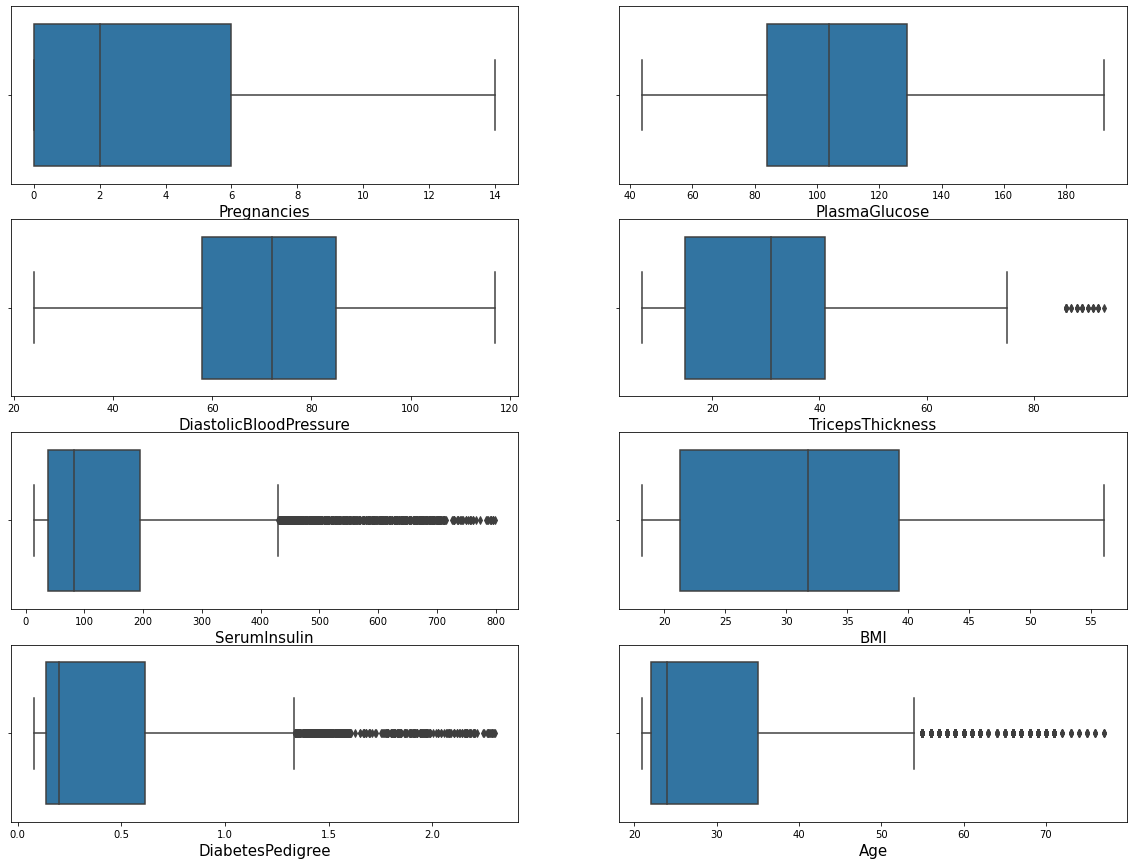

In [26]:
# detect outliers by boxplot visualization
plt.figure(figsize=(20,15))
for i,col in enumerate(cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

### Diabetic or not by feature

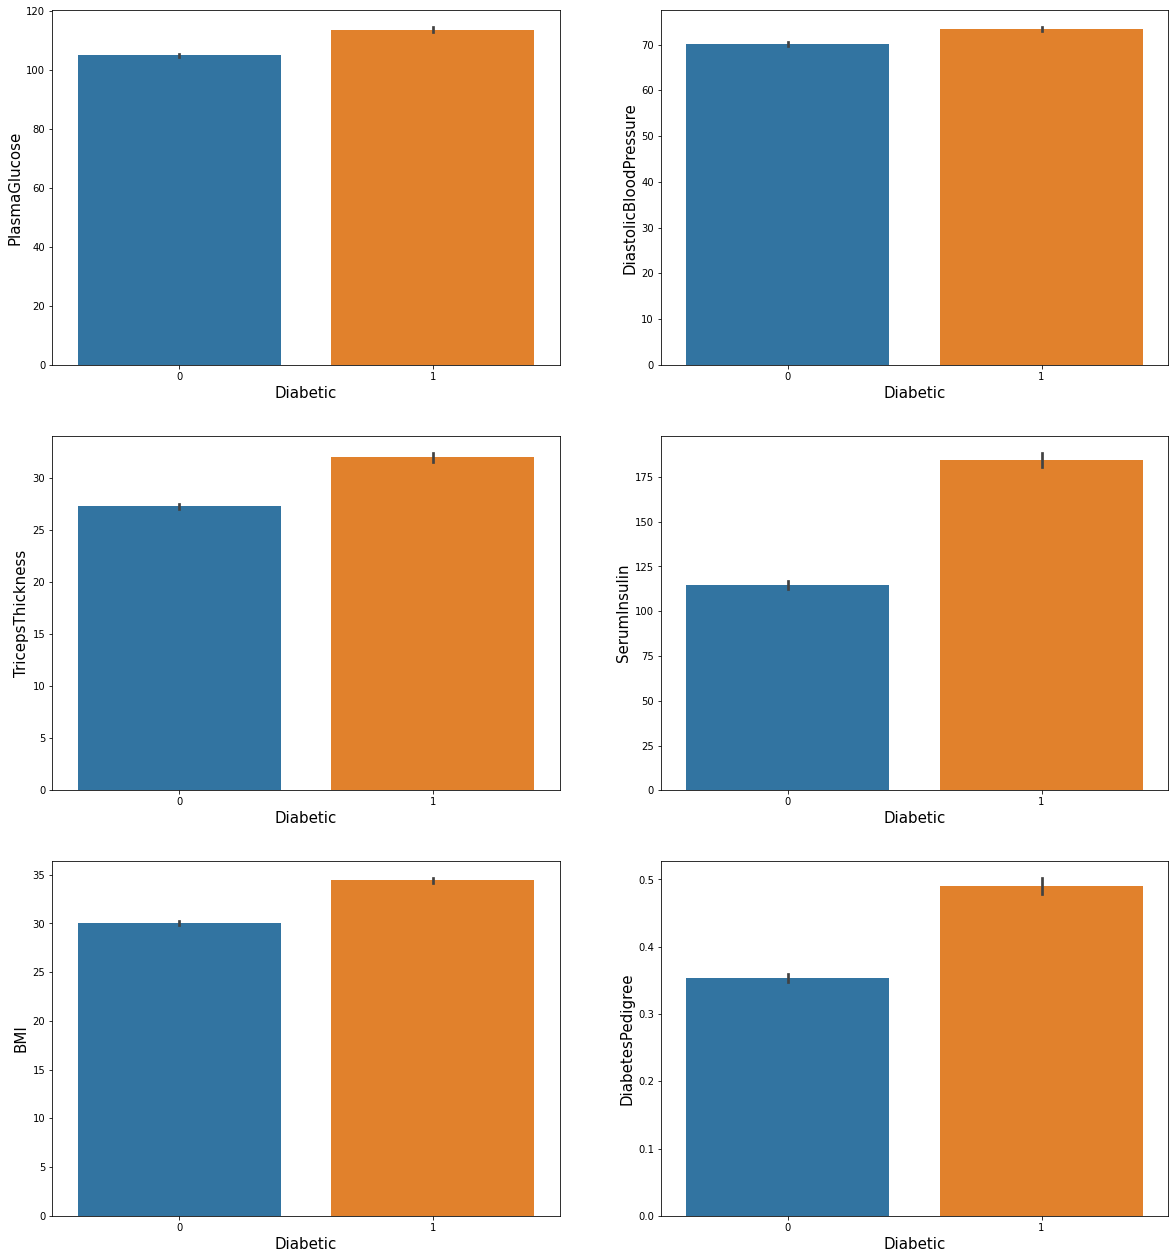

In [21]:
plt.figure(figsize=(20,30))
for i,col in enumerate(cols):
    plt.subplot(4,2,i+1)
    sns.barplot(data=df,x="Diabetic",y=col,)
    plt.xlabel("Diabetic", fontsize=15)
    plt.xticks(fontsize=10)
    plt.ylabel(col,fontsize=15)
    plt.yticks(fontsize=10)


### Let's view the feature correlation

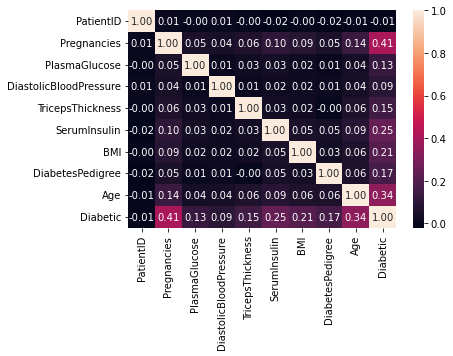

In [14]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'fontsize':10});